<a href="https://colab.research.google.com/github/Danito3d/Analisis-Estadisticos/blob/main/Analisis_de_Megabras_722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analisis realizado con analizador de redes en Ciudad de Trujillo***

### **Este notebook servira como referencia y patron de diseño usado para el procesamiento de datos del analizador Megabras 722**

#### **Proceso de carga de librerias, documento, inspeccion de carga, valoracion de datos y riqueza de los mismos**

In [ ]:
#Carga de librerias de dependencia para analisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as miss
import sys
pd.set_option('display.max_columns', None) #Impresion de maximo numero de columnas, despliegue completo
np.set_printoptions(threshold=sys.maxsize)
import cmath as cm
import math

In [ ]:
#Carga de archivo en formato CSV
doc = 'Data2.xlsx'
df = pd.read_excel(doc)

#Variables de interes, extraidas por dominio en tema
Interes = ['TIME', 
           'VRMS(V) L1 AVG', 
           'VRMS(V) L2 AVG', 
           'VRMS(V) L3 AVG', 
           'VTHD L1 MAX', 
           'VTHD L2 MAX', 
           'VTHD L3 MAX', 
           'IRMS(A) L1 AVG', 
           'IRMS(A) L2 AVG', 
           'IRMS(A) L3 AVG', 
           'ITHD L1 MAX', 
           'ITHD L2 MAX', 
           'ITHD L3 MAX', 
           'P(kW) ALL AVG', 
           'Q(kvar) ALL AVG', 
           'TPF ALL MAX', 
           'TPF ALL AVG', 
           'TPF ALL MIN',
           'TPF L1 AVG',
           'TPF L2 AVG',
           'TPF L3 AVG']
dfU = df[Interes]

In [ ]:
#Validacion de carga y descripcion simple de archivo
lista_interes = [dfU.info(), dfU.describe()]
for i in lista_interes:
  print(i)

In [ ]:
#Inspeccion de datos vacios e imputacion (De requerirse)
miss.matrix(dfU,
            figsize = (30, 10))

#### **Valoracion de tension bajo NTCSE / Corrida condicional y grafico**

In [ ]:
#Funcion de conteo de eventos encontrados en mala calidad de servicio.
def condiNTC(data):
  con_t = 0
  for i in data:
    if i < 209 or i > 242:
      con_t += 1
  if con_t > (3/len(data))*100:
    print('Existe nulidad de tolerancia en un {} %'.format(100 - (con_t/len(data))))
  else:
    print('Instalacion OK')

In [ ]:
dfE.apply(condiNTC)

<function matplotlib.pyplot.show>

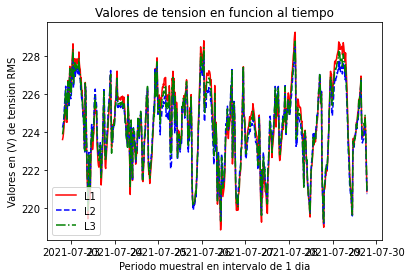

In [ ]:
#Plot de valores encontrados, analisis en el dominio del tiempo
plt.plot(dfU['TIME'], dfE.iloc[:, 0], color = 'r', linestyle = '-', label = 'L1')
plt.plot(dfU['TIME'], dfE.iloc[:, 3], color = 'b', linestyle = '--', label = 'L2')
plt.plot(dfU['TIME'], dfE.iloc[:, 6], color = 'g', linestyle = '-.', label = 'L3')
plt.title('Valores de tension en funcion al tiempo')
plt.xlabel('Periodo muestral en intervalo de 1 dia')
plt.ylabel('Valores en (V) de tension RMS')
plt.legend()
plt.show

#### **Valoracion de balances en corrientes**

In [ ]:
#Funcion de valoracion de las cargas dentro de sistema electrico en cuanto a desbalance.
def desI(i1,i2,i3):
  meanz = np.mean([np.mean(i1),np.mean(i2), np.mean(i3)])
  stdz = np.std([np.mean(i1),np.mean(i2), np.mean(i3)])
  z = (stdz / meanz) *100
  if z > 10:
    print('Existe un desequilibrio de corriente de {} %'.format(round(z, 2)))
  else:
    print('No hay desbalance notable')

In [ ]:
desI(i1 = dfTen2.iloc[:, 0],
     i2 = dfTen2.iloc[:, 1],
     i3 = dfTen2.iloc[:, 2])

Existe un desequilibrio de corriente de 14.24 %


#### **Valoracion de THDs**

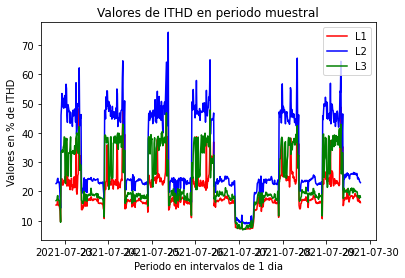

In [ ]:
#Analisis grafico de contribucion armonica en el dominio del tiempo y excesos bajo el indicador ITHD
plt.plot(dfU['TIME'], dfU['ITHD L1 MAX'], color = 'r', label = 'L1')
plt.plot(dfU['TIME'], dfU['ITHD L2 MAX'], color = 'b', label = 'L2')
plt.plot(dfU['TIME'], dfU['ITHD L3 MAX'], color = 'g', label = 'L3')
plt.xlabel('Periodo en intervalos de 1 dia')
plt.ylabel('Valores en % de ITHD')
plt.title('Valores de ITHD en periodo muestral')
plt.legend()
plt.show()

#### **Valoracion de FPs**

No handles with labels found to put in legend.


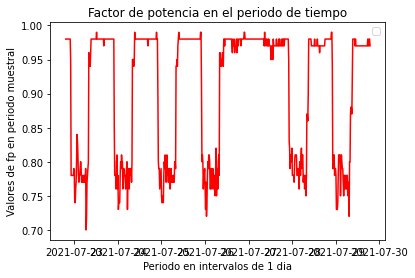

In [ ]:
#Analisis grafico de comportamiento en factor de potencia en el dominio del tiempo
plt.plot(dfU['TIME'],
         dfU['TPF ALL AVG'],
         color = 'r')
plt.title('Factor de potencia en el periodo de tiempo')
plt.xlabel('Periodo en intervalos de 1 dia')
plt.ylabel('Valores de fp en periodo muestral')
plt.show()

In [ ]:
#Codigo de testeo para segmentacion de datos de corriente. ADAELC = Aqui Data Analisis Electrico Lineas por Corrientes
df.iloc[:, [180:-1]]

In [ ]:
df.iloc[:, range(180, 2581)]

In [ ]:
dfE = df.iloc[:, range(181, len(df.columns))]

In [ ]:
df.iloc[:, 781] #ADAELC

In [ ]:
dfTen = df.iloc[:, range(193, len(df.columns))]#ADAELC

In [ ]:
dfE = df.iloc[:, range(181, len(df.columns))]#ADAELC

#### **Proceso para encontrar desfases entre angulos, para realizar diagrama vectorial ideal vs real de sistema electrico con cargas desequilibradas**

In [ ]:
#Extraccion y medio de valores de potencia promedio por cada linea
fp_list = [dfU['TPF L1 AVG'], dfU['TPF L2 AVG'], dfU['TPF L3 AVG']]
fp_val = []
for i in fp_list:
  x = np.mean(i)
  fp_val.append(round(x, 2))

In [ ]:
#Extraccion y media de valores de tension en fase
vol_list = [dfE.iloc[:, 0], 
            dfE.iloc[:, 3], 
            dfE.iloc[:, 6]]
vol_val = []
for i in vol_list:
  y = np.mean(i)
  vol_val.append(round(y, 1))

In [ ]:
vol_val

In [ ]:
#Determinacion de angulos a partir de los factores de potencia para adherir a desfases de 0, 240 y 120 grados.
angulos = []
re_val = [cx_val[0].real, cx_val[1].real, cx_val[2].real]
for i in re_val:
  ang = math.degrees(i)
  angulillos.append(round(ang,2))

In [ ]:
angulillos

[18.19, 30.68, 27.13]

In [ ]:
#Creacion de tuplas entre valores de tension modulo y angulos provistos.
mod_ang = [np.array(vol_val), ang_reales]

In [ ]:
mod_ang

[array([224.4, 224.3, 224.4]), array([ 18.19, 270.68, 147.13])]